# PART I

**Question 1: Defanging an IP Address, by Amazon**

- Given a valid (IPv4) IP address, return a defanged version of that IP address.
- A defanged IP address replaces every period “.” with “[.]”.

In [1]:
def defang_IP(address):
    new_address = ''
    split_address = address.split('.')
    separator = '[.]'
    new_address = separator.join(split_address)
    return new_address

input_address = "255.100.50.0"
result = defang_IP(input_address)
result

'255[.]100[.]50[.]0'

**Question 2: Fizz Buzz, by Microsoft, Bloomberg**

- Write a program that prints the number for 1 to 50, for number multiple of 2 print ‘fizz’ instead of a number, for numbers multiple of 3 print ‘buzz’, for numbers which are multiples of both 2 and 3 ‘fizzbuzz.’

In [2]:
for i in range(1,51):
    if i%2 == 0:
        print('fizz')
    elif i%3 == 0:
        print('buzz')
    elif i%6 == 0:
        print('fizzbuzz')
    else:
        print(i)

1
fizz
buzz
fizz
5
fizz
7
fizz
buzz
fizz
11
fizz
13
fizz
buzz
fizz
17
fizz
19
fizz
buzz
fizz
23
fizz
25
fizz
buzz
fizz
29
fizz
31
fizz
buzz
fizz
35
fizz
37
fizz
buzz
fizz
41
fizz
43
fizz
buzz
fizz
47
fizz
49
fizz


**Question 3: Palindrome Number, by Google, FB, and MS**

- Identity all words that are palindromes in the following sentence “To be or not to be a data scientist, this is not a question. Ask your mom, lol.”
- If the same word appears multiple times, return the word once (condition 1)
- Palindromes: words that return the same result when you read from the beginning to the end or the end to the beginning (condition 2)

In [3]:
line = 'To be or not to be a data scientist, this is not a question. Ask your mom, lol.'

import re

def palindrome(line):
    split_line = re.sub('[^a-zA-Z]',' ', line)
    split_line = split_line.lower().split(' ')
    split_line = list(dict.fromkeys(split_line))

    palindromes = []

    for word in split_line:
        if word == word[::-1]:
            palindromes.append(word)
    palindromes = [x for x in palindromes if x] 
    
    return palindromes
        
palindrome(line)


['a', 'mom', 'lol']

In [4]:
#without re

def palindrome_2(sentence):
    
    for i in (",.'?/><}{{}}'"):             # remove all punctuation marks 
        sentence = sentence.replace(i, "")
    
    palindrome = []                         # empty list 
    words = sentence.split(' ')             # split based on whitespace
    
    for word in words:                      # iterate over the list 
        word = word.lower()                 # lower case 
        if word == word[::-1]:              # if statement to determine if it is a palindrome
            palindrome.append(word)         # if so, append it to the list
        
    return list(set(palindrome))

palindrome_2(line)

['a', 'mom', 'lol']

**Question 4: First Unique Character in a String, by FAANG**
    
- Given a string, find the first non-repeating character in it and return its index.
- If it doesn’t exist, return -1.

In [5]:
string = "I am a data scientist."


def first_unique(string):
    for i in range(len(string)):      
        c = string[i]                 
        if string.count(c)==1:        
            return i                  
                                      
        return -1

string = "aabb"
first_unique(string)

-1

**Question 5: Unique Email Addresses, by Google, Amazon, and Adobe**

- Every email consists of a local name and a domain name, separated by the @ sign.
- For example, in alice@leetcode.com, alice is the local name, and leetcode.com is the domain name.
- Besides lowercase letters, these emails may contain ‘.’s or ‘+’s.
- If you add periods (‘.’) between some characters in the local name part of an email address, mail sent there will be forwarded to the same address without dots in the local name. For example, “alice.z@leetcode.com” and “alicez@leetcode.com” forward to the same email address. (Note that this rule does not apply for domain names.)
- If you add a plus (‘+’) in the local name, everything after the first plus sign will be ignored. This allows certain emails to be filtered, for example m.y+name@email.com will be forwarded to my@email.com. (Again, this rule does not apply for domain names.)
- It is possible to use both of these rules at the same time.
- Given a list of emails, we send one email to each address in the list. How many different addresses actually receive mails?

In [6]:
emails = ["test.email+alex@leetcode.com","test.e.mail+bob.cathy@leetcode.com","testemail+david@lee.tcode.com"]

def count_unique_emails(emails):
    new_emails = []

    for email in emails:
        email_split = email.split('@')
        local_name = email_split[0]
        domain_name = email_split[1]

        local_name = local_name.replace('.', '')
        local_name = local_name.split('+')[0]

        separator = '@'
        new_email = separator.join([local_name, domain_name])
        new_emails.append(new_email)
    
    result = len(set(new_emails))
    return result

count_unique_emails(emails) 

2

**Question 6 Destination City, by Yelp**

- You are given the array paths, where paths[i] = [cityAi, cityBi] means there exists a direct path going from cityAi to cityBi.
- Return the destination city, that is, the city without any path outgoing to another city.
- It is guaranteed that the graph of paths forms a line without any loop, therefore, there will be exactly one destination city.

In [7]:
def destination_city(paths):
    income_city = [path[1] for path in paths]
    outcome_city = [path[0] for path in paths]
    
    result = set(income_city) - set(outcome_city)
    
    return result


paths = [["London","New York"],["New York","Lima"],["Lima","Sao Paulo"]]
destination_city(paths)

{'Sao Paulo'}

# PART II

**Question 1: Who wins first? By Microsoft**

Amy and Brad take turns in rolling a fair six-sided die. Whoever rolls a “6” first wins the game. Amy starts by rolling first. What’s the probability that Amy wins?

In [8]:
import numpy as np

def who_won(die, size):
    A_count = 0 
    B_count = 0 
    
    for i in range(size):
        A_6 = np.random.choice(die)  # roll the fair dice and choose a random value from 0 to 6
        if A_6 == 6:       # if A rolls a 6, then A_count adds 1. 
            A_count += 1     
        
        else:              # if the above if condition does not fullfill
            B_6 = np.random.choice(die)  # then, it's B's turn to roll the dice, which is a random choice from 0 to 6.
            if B_6 == 6:   
                B_count += 1
                
    return A_count/(A_count+B_count)

# return the total number of cases that A won divided by the combined number of A and B. the result is the probability that Amy wins.


np.random.seed(123)

die = [1,2,3,4,5,6]

size = 10000

who_won(die,size)

0.531271015467384

**Question 2: Maximum 69 Number, by every major company**

- Given a positive integer num consisting only of digits 6 and 9.
- Return the maximum number you can get by changing at most one digit (6 becomes 9, and 9 becomes 6).

In [9]:
def maximize(number):
    try:
        i = str(number).index('6')
        new_number = list(str(number))
        new_number[i] = '9'
        new_number = ''.join(new_number)
        return (new_number)
    
    except ValueError:
        return number
    
maximize(6999)    

'9999'

In [10]:
#simplier function

def max_69_once(num):
    return int(str(num).replace('6','9',1))

# test case
num = 966666669
max_69_once(num)

996666669

**Question 3: Valid Perfect Square. By Facebook**

- Given a positive integer num, write a function that returns True if num is a perfect square else False.
- Follow up: Do not use any built-in library function such as sqrt.

In [11]:
def perfect_square(number):
    i = 1
    a = 0
    while number > a:
        a += i
        i += 2
    if number == a:
        return True
    else:
        return False
    
    
perfect_square(1024)


True

**Question 4: Factorial Trailing Zeroes. By Bloomberg**

- Given an integer n, return the number of trailing zeroes in n!
- Follow up: Could you write a solution that works in logarithmic time complexity?

In [12]:
#I don't like recursive fucntions, but it seems reasonable to use recursion here

def factorial(n):
    if n <2:
        return 1
    else:
        return n * factorial (n-1)
    
def trailing_zeroes(number):
    factorial_number = factorial(number)
    factorial_number = list(str(factorial_number)[::-1])
    count_zero = 0
    
    for i in factorial_number:
        if i == '0':
            count_zero += 1
        else:
            break
    
    return count_zero

trailing_zeroes(20)
    

4

**Question 5: Perfect Number, by Amazon**
    
- A perfect number is a positive integer that is equal to the sum of its positive divisors, excluding the number itself.
- A divisor of an integer x is an integer that can divide x evenly.
- Given an integer n, return true if n is a perfect number, otherwise, return false.

In [13]:
def perfect_number(number):
    if number < 0:
        return False
    
    else:
        divisors = []
        x = 1

        while number > x:
            if number%x == 0:
                divisors.append(x)
            x += 1
        
        sum_divisors = 0

        for i in divisors:
            sum_divisors += i
       
        if number == sum_divisors:
            return True
        else:
            return False
        

perfect_number(8128)

True

# PART III

**Question 1:**
Given a 4x4 Numpy matrix, how to reverse the matrix?

In [14]:
matrix = np.arange(1,17).reshape(4,4)
print(matrix)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [21]:
matrix_reshape = matrix.reshape(1,-1)
#another way to flattern matrix - np.array.flatten()

matrix_reshape = matrix_reshape[0][::-1]
matrix_reshape = matrix_reshape.reshape(4,4)
matrix_reshape

array([[16, 15, 14, 13],
       [12, 11, 10,  9],
       [ 8,  7,  6,  5],
       [ 4,  3,  2,  1]])

**Question 2:**
How do you multiply two matrices?

In [22]:
A = np.arange(9).reshape(3,3)
B = np.arange(10,19).reshape(3,3)

A,B

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]]))

In [23]:
result = A.dot(B)
result

array([[ 45,  48,  51],
       [162, 174, 186],
       [279, 300, 321]])

In [29]:
#solution with iterations
X = [[1,2,3],
    [2,3,4],
    [4,3,2]]

Y = [[2,3,4],
    [3,4,6],
    [2,3,5]]

Z = [[0,0,0],[0,0,0],[0,0,0]]

for i in range(len(X)): #iterate over X-rows
    for j in range (len(Y[0])): #iterate over Y-columns
        for k in range (len(Y)): #iterate over Y-rows
            Z[i][j] += X[i][k] * Y[k][j]
        
Z

[[14, 20, 31], [21, 30, 46], [21, 30, 44]]

**Question 3:**
How to transpose a matrix?

In [30]:
C = [[1,2,3],
    [2,3,4],
    [4,3,2]]
C

[[1, 2, 3], [2, 3, 4], [4, 3, 2]]

In [37]:
C_transposed = [[0,0,0],[0,0,0],[0,0,0]]

for i in range(len(C)):
    for j in range(len(C[0])):
        C_transposed[i][j] = C[j][i]

print('Manual function:')
print(C_transposed)

print('\nNumpy array and numpy.array.T:')
print(np.array(C).T)

print('\nNumpy array and np.transpose():')
print(np.transpose(C))

Manual function:
[[1, 2, 4], [2, 3, 3], [3, 4, 2]]

Numpy array and numpy.array.T:
[[1 2 4]
 [2 3 3]
 [3 4 2]]

Numpy array and np.transpose():
[[1 2 4]
 [2 3 3]
 [3 4 2]]


**Question 4:**
How to add two Numpy matrices together?

In [39]:
D = [[12,7,3],
    [4 ,5,6],
    [7 ,8,9]]

E = [[5,8,1],
    [6,7,3],
    [4,5,9]]

D_np = np.array(D)
E_np = np.array(E)

result = D_np + E_np
result

array([[17, 15,  4],
       [10, 12,  9],
       [11, 13, 18]])

In [40]:
#if I cannot use Numpy

result_2 = [[0,0,0],[0,0,0],[0,0,0]] #np.zeros(3,3)

for i in range(len(D)):
    for j in range(len(E)):
        result_2[i][j] = D[i][j] + E[i][j]
        
result_2

[[17, 15, 4], [10, 12, 9], [11, 13, 18]]

**How to stack matrices horizontally?**


In [42]:
np.hstack((D,E))

array([[12,  7,  3,  5,  8,  1],
       [ 4,  5,  6,  6,  7,  3],
       [ 7,  8,  9,  4,  5,  9]])

**How to stack matrices vertically?**

In [44]:
np.vstack((D,E))

array([[12,  7,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [ 5,  8,  1],
       [ 6,  7,  3],
       [ 4,  5,  9]])

# SIMULATIONS

**Question 1: Uniform Distribution**

- For a sequence of numbers, (a1,a2,a3,a4,…,an), please write a function that randomly returns each element, ai, with probability ai/∑ai. (Condition 1)

- For example, for a sequence (1,2,3,4), the function returns element 1 with a probability of 1/10 and 4 with a probability of 4/10. (Condition 2)

- You can use any library, but no random.choice(). (Condition 3)

In [54]:
def seq_prob(sequence):
    probabilities = []
    total = sum(sequence)
    
    for i in range(len(sequence)):
        probabilities.append(sequence[i]/total)
    return probabilities
        
seq = [1,2,3,4,5,6,7,8]
seq_prob(seq)

np.random.choice(seq, 1, replace = False, p = seq_prob(seq))

array([1])

In [62]:
#NO RANDOM.CHOICE

def random_choice(sequence):
    probabilities = [] # probabilities of each element ai/∑ai
    cum_probabilities = []  # cumulative probabilities of each element 
    
    total = sum(sequence)
    
    uniform = np.random.uniform(0,1)
    
    for i in range(len(sequence)):
        
        probabilities.append(sequence[i]/total)
        cum_probabilities.append(sum(probabilities))
        
        if uniform < cum_probabilities[i]:
            break
      
    return  sequence[i]
    
random_choice(seq)  

8

**Question 2: Binomial Distribution**

- An online shopping website (e.g., Amazon, Alibaba, etc.) wants to test out two versions of banners that will appear on the website’s top. The engineering team assigns the probability of visiting version A at 0.6 and version B at 0.4.
- After 10,000 visits, there are 6050 visitors being exposed to version A, and 3950 people exposed to version B.
- What is the probability that there are 6050 cases when the randomization process is correct?
- In other words, the probability for version A is indeed 0.6.

In [68]:
np.random.seed(123)

def some_funct(number_trials, probability_A):
    
    binomial_dist = np.random.binomial(n = number_trials, p = probability_A, size=10000) # generate a binomial distribution with n = number, p 
    
    count = 0 
    
    for value in binomial_dist: 
        
        if value > 6050: 
            
            count += 1
            
    return count/number_trials # probability that cases larger than 6050 out of number_trials 

some_funct(number_trials=10000, probability_A = 0.6)

0.1498

**Question 3: Poisson Distribution**

My medium blog has 500 visits per day, and the number of visits follows a Poisson distribution. Out of 1000 times, what is the ratio of more than 510 visits per day? Write a function to simulate the process.

*VERY strange task. I suppose that np = 500 = lambda, m = 510.*

In [70]:
def Poisson(value_1,value_2): 
    
    count = 0                
    poisson = np.random.poisson(lam = value_1, size = value_2) # a poisson distribution

    for i in poisson:         
        if i > 510:           
            
            count+=1 
            
    return(count/value_2)     
    
Poisson(500,1000)

0.312

**Question 4: Normal Distribution**

Write a function to generate X samples from a normal distribution and plot the histogram.

(array([ 4.,  7., 14., 15., 21., 16., 10.,  6.,  5.,  2.]),
 array([-2.33754577, -1.82111724, -1.3046887 , -0.78826017, -0.27183163,
         0.2445969 ,  0.76102543,  1.27745397,  1.7938825 ,  2.31031104,
         2.82673957]),
 <a list of 10 Patch objects>)

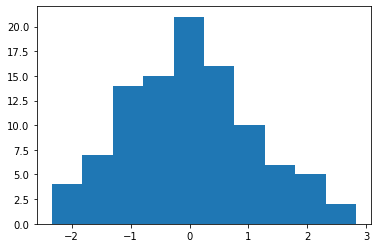

In [75]:
def normal_func(X): 
    
    norm_dist = np.random.normal(loc = 0, scale = 1, size = 10000) 
    
    result = np.random.choice(norm_dist, X)               
    
    return(result)                                        
    
X_samples = normal_func(100)                               
X_samples                                                  

import matplotlib.pyplot as plt   

plt.hist(X_samples)                                       

# Essential Python Coding Questions

**Question 1: Reverse the String**

- Write a function that reverses the string.
- sentence = “I love programming in Python. How about you?”

In [88]:
sentence = 'I love programming in Python. How about you?'

sentence_reversed = sentence[::-1]
print(sentence_reversed)

#list comprehension
sentence_reversed_2 = ''.join(sentence[-i] for i in range(1, len(sentence)+1))
print(sentence_reversed_2)

Wall time: 0 ns
?uoy tuoba woH .nohtyP ni gnimmargorp evol I
Wall time: 0 ns
?uoy tuoba woH .nohtyP ni gnimmargorp evol I


**Question 2: Fibonacci Number, by FAANG**

- The Fibonacci numbers, commonly denoted F(n) form a sequence, called the Fibonacci sequence, such that each number is the sum of the two preceding ones, starting from 0 and 1.
That is,
F(0) = 0, F(1) = 1,
F(n) = F(n -1) + F(n-2), for n > 1.
- Given n, calculate F(n).

In [91]:
#I don't like recusrsion, but I suits here

def fibonacci(n):
    if n <= 1:
        return n
    else:
        result = fibonacci(n-1) + fibonacci(n-2)
        return result
    
fibonacci(7)

13

**Question 3: Check If Two String Arrays are Equivalent, by Facebook**

- Given two string arrays word1 and word2, return true if the two arrays represent the same string, and false otherwise.
- A string is represented by an array if the array elements concatenated in order forms the string.

In [92]:
def check_strings(str1, str2):
    if ''.join(str1) == ''.join(str2):
        return True
    else:
        return False

word1 = ["ab", "c"]
word2 = ["a", "bc"]
check_strings(word1, word2)

True

**Question 4: Matrix Diagonal Sum, by Adobe**

- Given a square matrix mat, return the sum of the matrix diagonals.
- Only include the sum of all the elements on the primary diagonal and all the elements on the secondary diagonal that are not part of the primary diagonal.

In [111]:
mat = [[1,1,1,1,1],
       [1,1,1,1,1],
       [1,1,3,1,1],
       [1,1,1,1,1],
       [1,1,1,1,1]]

def sum_diag(matrix):
    total = 0
    for i in range(len(matrix)):
        total += matrix[i][i]
        
    for i,j in zip(range(len(matrix)), range(len(matrix)-1, -1, -1)):
        total += matrix[i][j]
            
    return total
        
sum_diag(mat)

14

In [112]:
# add all the elements on the secondary diagonal that are not part of the primary diagonal

def sum_diag_2(matrix):
    total = 0
    for i in range(len(matrix)):
        total += matrix[i][i]
        
    for i,j in zip(range(len(matrix)), range(len(matrix)-1, -1, -1)):
        if i != j:
            total += matrix[i][j]
            
    return total

sum_diag_2(mat)

11

**Question 5: Final Prices With a Special Discount in a Shop, by Dream11**

- Given the array prices where prices[i] is the price of the ith item in a shop.
- There is a special discount for items in the shop, if you buy the ith item, then you will receive a discount equivalent to prices[j] where j is the minimum index such that j > i and prices[j] <= prices[i], otherwise, you will not receive any discount at all.
- Return an array where the ith element is the final price you will pay for the ith item of the shop considering the special discount.

In [113]:
prices = [8,4,6,2,3]

def discount(prices):
    n = len(prices)                   
      
    for i in range(n-1):              
        for j in range(i+1,n):        
            if prices[i]>=prices[j]:  
                prices[i]-=prices[j]  
                break                 
    return prices

discount(prices)

[4, 2, 4, 2, 3]

**Question 6: Reverse Words in a String III, by Amazon**

- Given a string, you need to reverse the order of characters in each word within a sentence while still preserving whitespace and initial word order.

In [121]:
s ="Let's take LeetCode contest"

def reverse_characters(sentence):
    words = sentence.split(' ')
    new_words = []
    for i in words:
        new_words.append(i[::-1])
    
    result = ' '.join(new_words)
    
    return result

reverse_characters(s)

"s'teL ekat edoCteeL tsetnoc"

# Bootstrap and Statistical Inference

**Practical Question: With one sample, how do you calculate the Confidence Interval for the population mean and standard deviation?**

This is a straightforward question, which fits the requirements of the bootstrap method (from a single sample to population statistics). We will use a simulated example for this question. Hypothetically, we have collected data on body weights of half a million male adults in America, and it ranges from 100 to 240.

In [122]:
# step 1: simulate population distribution
weight_pop = np.random.randint(100, 240, size = 500000) # simulated population distribution

mean = np.mean(weight_pop)

std = np.std(weight_pop)
mean, std

(169.57339, 40.39615914796727)

In [123]:
# step 2: take a random sample from the population

weight_sample = np.random.choice(weight_pop, size = 1000)

sample_mean = np.mean(weight_sample) # sample mean

sample_std = np.std(weight_sample) # sample std

sample_mean, sample_std

(168.129, 39.70413528840542)

In [124]:
# step 3: bootstrap for 10,000 times

boot_means = []

for _ in range(10000):
    boot_sample = np.random.choice(weight_sample,replace = True, size = 1000) # take a random sample each iteration
    boot_mean = np.mean(boot_sample)# calculate the mean for each iteration
    boot_means.append(boot_mean) # append the mean to boot_means

    boot_means_np = np.array(boot_means) # transform it into a numpy array for calculation

boot_means_np

array([168.824, 167.503, 168.72 , ..., 168.311, 167.216, 168.03 ])

In [125]:
# step 4: analysis and interpretation 

boot_means = np.mean(boot_means_np) # bootstrapped sample means
print(boot_means)

print(mean)

boot_std = np.std(boot_means_np) # bootstrapped std
print(boot_std)

np.percentile(boot_means_np, [2.5,97.5]) # 95% C.I.

168.136657
169.57339
1.250535048909466


array([165.71095 , 170.628025])

**Practical Question: If you only know a median for a dataset of size 10, how do you calculate the standard error of the median?**

In [126]:
# step 0: create a population distribution of 100 random numbers from 0 to 200
pop = np.random.randint(200, size = 100)

In [127]:
# step 1: take a random sample of size 10

sample_1= np.random.choice(pop,10)
sample_1

array([ 84, 121, 121,  91, 120,  95, 184,  46,  59,  41])

In [128]:
np.median(sample_1)

93.0

In [129]:
# step 2: what’s the median of this sample (sample_1)?

def median_value(some):
    
    n = len(some)
    
    some.sort()
    
    if n % 2 == 0: 
        median1 = some[n//2]
        median2 = some[n//2-1]
        median = (median1+median2)/2
    
    else: 
        median = some[n//2]
        
    return median 

median_value(sample_1)

93.0

In [130]:
# step 3: repeatedly sample from the sample (sample_1) with replacement, aka. bootstrap


boot_sample_medians = []

for i in range(10000):
    
    boot_sample = np.random.choice(sample_1,replace = True, size = 10)
    
    boot_median = median_value(boot_sample)
    
    boot_sample_medians.append(boot_median)

In [131]:
# step 4: stand error and confidence interval

print(np.std(boot_sample_medians))

# the average value of repeated samples' median values
print(sum(boot_sample_medians)/len(boot_sample_medians))

# C.I.
# wide CI for small sample sizes, b/c of limited sampling possibilities and large variation
boot_median_CI = np.percentile(boot_sample_medians, [2.5,97.5])
boot_median_CI

16.597456317083655
95.41445


array([ 59., 121.])

# FINAL PART - simple questions and algorithms

**Mean. Compute the mean of number in a list**

In [132]:
x = [4, 36, 45, 50, 75]

def mean(array):
    if len(array) > 0:
        return sum(array)/len(array)
    else:
        return float('NaN')
    
mean(x)

42.0

**STD. Calculate the standard deviation of elements in a list.**


In [135]:
y = [1,2,3,4]

def std(array):
    if len(array) > 1:
        sum_error = 0
        array_mean = mean(array)
        for i in array:
            sum_error += (i - array_mean)**2
        
        return np.sqrt(sum_error/len(array))
    else:
        return float('N')
std(y)            

1.118033988749895

**RMSE. Calculate the RMSE (root mean squared error) of a model. The function takes in two lists: one with actual values, one with predictions.**

In [138]:
actuals = [1, 2, 3]
predictions = [3, 2, 1]

def RMSE(actuals, predictions):
    assert len(actuals) == len(predictions)
    squares = sum((actual - prediction)**2 for actual, prediction in zip(actuals, predictions))
    return np.sqrt(squares/len(actuals))

RMSE(actuals, predictions)

1.632993161855452

**Count. Count how many times each element in a list occurs.**

In [140]:
l = [1, 3, 2, 1, 5, 3, 5, 1, 4]

def count_values(list):
    counter = dict()
    for i in list:
        counter[i] = counter.get(i, 0) + 1
    return counter

print(count_values(l))

from collections import Counter

print(Counter(l))
    

{1: 3, 3: 2, 2: 1, 5: 2, 4: 1}
Counter({1: 3, 3: 2, 5: 2, 2: 1, 4: 1})


**RLE. Implement RLE (run-length encoding): encode each character by the number of times it appears consecutively.**

In [141]:
string = 'aaaabbbcca'

def RLE(string):
    ans = [], None
    cur = None
    num = 0
    
    for i in range(len(string)):
        if i == 0:                       # if it's a first letter
            cur, num = string[i], 1
            
        elif cur != string[i]:           # for the first time cur = None, further it's previous letter
            ans.append((cur, num))
            cur, num = string[i], 1     # if letter is the first time, num = 1
        else:
            num += 1
            
        if i == len(string) - 1:         #if it's last letter
            ans.append((cur, num))
            
    return ans

RLE(string)    

[('a', 4), ('b', 3), ('c', 2), ('a', 1)]

**Jaccard. Calculate the Jaccard similarity between two sets: the size of intersection divided by the size of union.**

In [142]:
a = {'a', 'b', 'c'}
b = {'a', 'd'}

def jaccard(a,b):
    return (len(a&b)/len(a|b))

jaccard(a,b)

0.25